/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:124: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


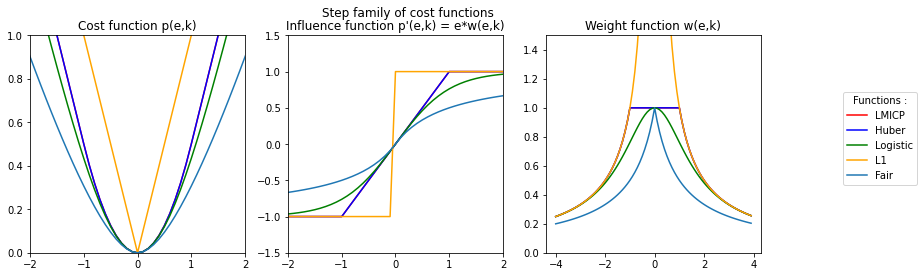

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:163: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


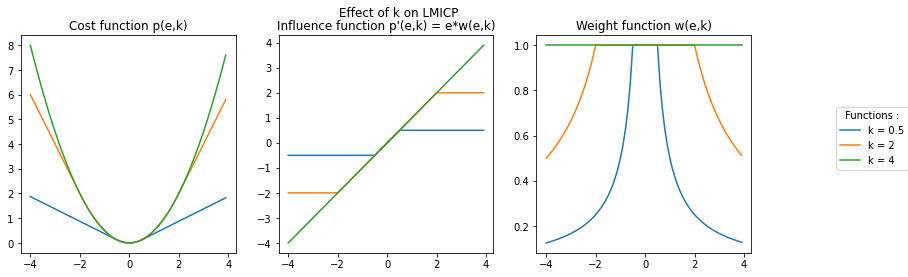

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:199: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


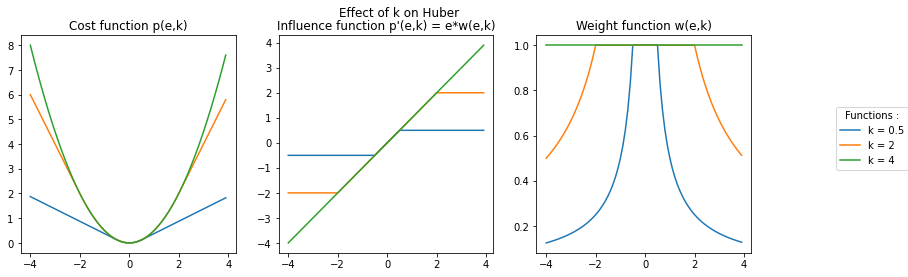

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:233: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


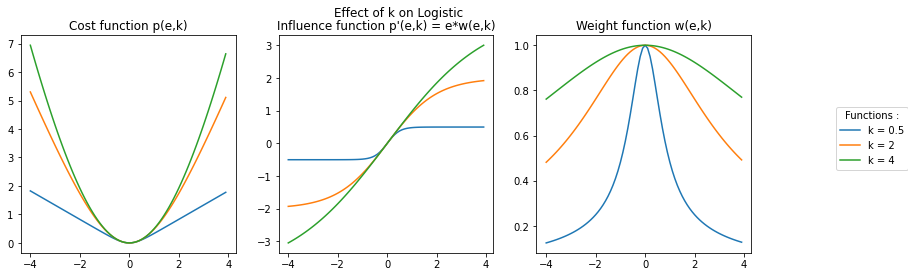

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:257: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


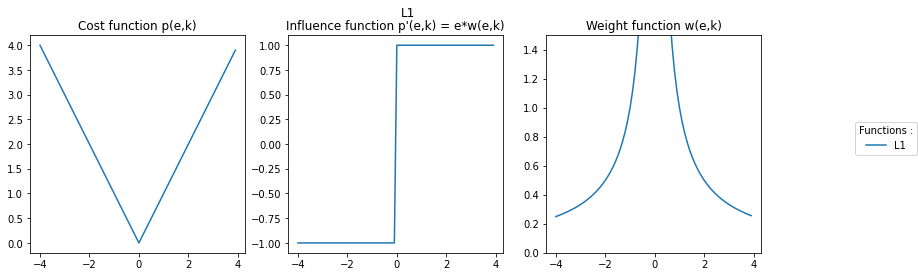

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:290: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


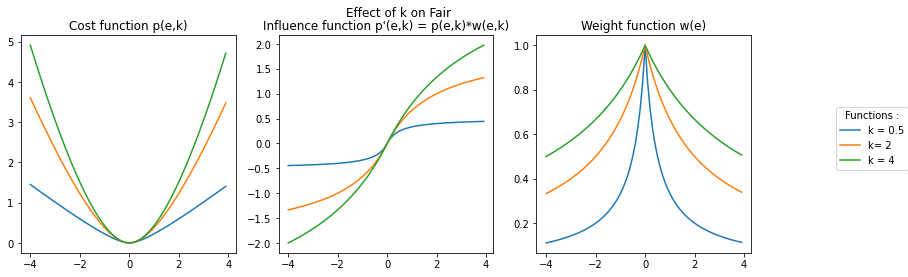

In [6]:
import matplotlib.pyplot as plt
import numpy as np

e = np.arange(-4,4,0.1)
#---------------------------STEP FAMILY---------------------------------------------------
def EMICP(e):##################################
    p = [0 for i in range(e.size)]
    w = [0 for i in range(e.size)]
    w_i = [0 for i in range(e.size)]
    m = [0 for i in range(e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=3):
            p[i] = np.absolute(e[i])
            w[i] = 1/e[i]
            w_i[i] = 1/np.absolute(e[i])
            m[i] = p[i]*w[i]
        else:
            p[i] = 0
            w[i] = 0
            w_i[i] = 0
            m[i] = p[i]*w[i]
    i = w_i*e
    return (p,w,i,m)###########################

def Fair(e,k):
    p = np.power(k,2)*((np.absolute(e)/k)-np.log(1+(np.absolute(e)/k)))
    w = 1/(1+(np.absolute(e)/k))
    i = w*e
    m = p*w
    return (p,w,i,m)

def L1(e):
    p = np.absolute(e)
    w = 1/np.absolute(e)
    i = w*e
    m = p*w
    return (p,w,i,m)

def Huber(e,k):
    p = [0 for i in range (e.size)]
    w = [0 for i in range (e.size)]
    m = [0 for i in range (e.size)]
    for i in range(e.size):
        if(np.absolute(e[i])<=k):
            p[i] = np.power(e[i],2)/2
            w[i] = 1
            m[i] = p[i]*w[i]
        else:
            p[i] = k*(np.absolute(e[i])-(k/2))
            w[i] = k/(np.absolute(e[i]))
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

def LMICP(e,k):
    p = [0 for i in range(e.size)]
    w = [0 for i in range(e.size)]
    m = [0 for i in range(e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=k):
            p[i] = np.power(e[i],2)/2
            w[i] = 1
            m[i] = p[i]*w[i]
        else:
            p[i] = k*(np.absolute(e[i])-(k/2))
            w[i] = k/np.absolute(e[i])
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

def Logistic(e,k):
    p = (np.power(k,2))*np.log((np.exp(e/k)+np.exp(-(e/k)))/2)
    w = np.tanh(e/k)/(e/k)
    i = w*e
    m = p*w
    return (p,w,i,m)
#---------------------------PLOTTING------------------------------------------------------
(p_LMICP,w_LMICP,i_LMICP,m_LMICP) = LMICP(e,1)
(p_Huber,w_Huber,i_Huber,m_Huber) = Huber(e,1)
(p_Logistic,w_Logistic,i_Logistic,m_Logistic) = Logistic(e,1)
(p_L1,w_L1,i_L1,m_L1) = L1(e)
(p_Fair,w_Fair,i_Fair,m_Fair) = Fair(e,1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Step family of cost functions')

# Labels to use in the legend for each line
line_labels = ["LMICP", "Huber", "Logistic", "L1","Fair"]

# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created

ax1.set_xlim([-2,2])
ax1.set_ylim([-0,1])
ax1.title.set_text('Cost function p(e,k)')
l1 = ax1.plot(e, p_LMICP, color="red")[0]
l2 = ax1.plot(e, p_Huber, color="blue")[0]
l3 = ax1.plot(e, p_Logistic, color="green")[0]
l4 = ax1.plot(e, p_L1, color="orange")[0]
l5 = ax1.plot(e, p_Fair)[0]

ax2.set_xlim([-2,2])
ax2.set_ylim([-1.5,1.5])
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
l6 = ax2.plot(e, i_LMICP, color="red")[0]
l7 = ax2.plot(e, i_Huber, color="blue")[0]
l8 = ax2.plot(e, i_Logistic, color="green")[0]
l9 = ax2.plot(e, i_L1, color="orange")[0]
l10 = ax2.plot(e, i_Fair)[0]

ax3.set_ylim([0,1.5])
ax3.title.set_text('Weight function w(e,k)')
l11 = ax3.plot(e, w_LMICP, color="red")[0]
l12 = ax3.plot(e, w_Huber, color="blue")[0]
l13 = ax3.plot(e, w_Logistic, color="green")[0]
l14 = ax3.plot(e, w_L1, color="orange")[0]
l15 = ax3.plot(e, w_Fair)[0]

# Create the legend
fig.legend([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on LMICP')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k = 2","k = 4"]

(p,w,i,m) = LMICP(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = LMICP(e,2)
l5 = ax1.plot(e, p)[0]
l6 = ax2.plot(e, i)[0]
l7 = ax3.plot(e, w)[0]

(p,w,i,m) = LMICP(e,4)
l9 = ax1.plot(e, p)[0]
l10 = ax2.plot(e, i)[0]
l11 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Huber')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k = 2","k = 4"]

(p,w,i,m) = Huber(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Huber(e,2)
l5 = ax1.plot(e, p)[0]
l6 = ax2.plot(e, i)[0]
l7 = ax3.plot(e, w)[0]

(p,w,i,m) = Huber(e,4)
l9 = ax1.plot(e, p)[0]
l10 = ax2.plot(e, i)[0]
l11 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Logistic')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k = 2","k = 4"]

(p,w,i,m) = Logistic(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Logistic(e,2)
l5 = ax1.plot(e, p)[0]
l6 = ax2.plot(e, i)[0]
l7 = ax3.plot(e, w)[0]

(p,w,i,m) = Logistic(e,4)
l9 = ax1.plot(e, p)[0]
l10 = ax2.plot(e, i)[0]
l11 = ax3.plot(e, w)[0]
    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)')
# Create the legend
fig.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('L1')

# Labels to use in the legend for each line
line_labels = ["L1"]

(p,w,i,m) = L1(e)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
ax3.set_ylim([0,1.5])
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3, l4],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Fair')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k= 2", "k = 4"]

(p,w,i,m) = Fair(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Fair(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
(p,w,i,m) = Fair(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = p(e,k)*w(e,k)")
ax3.title.set_text('Weight function w(e)') 
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()